In [24]:
import pandas as pd
%matplotlib inline

In [19]:
df = pd.read_csv('df_final.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 27 columns):
Unnamed: 0               2175 non-null int64
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
id                       1836 non-null float64
favorite_count           1836 non-null float64
retweet_count            1836 non-null float64
display_text_range       1836 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog              

In [21]:
df.drop(columns=['id', 'Unnamed: 0', 'in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

In [27]:
df.loc[df.favorite_count.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
648,671362598324076544,2015-11-30 16:18:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Tanner. He accidentally dropped all hi...,https://twitter.com/dog_rates/status/671362598...,11,10,Tanner,NaN,NaN,...,tub,0.393616,False,bathtub,0.383522,False,swimming_trunks,0.077301,False,None
649,671390180817915904,2015-11-30 18:07:47,"<a href=""http://twitter.com/download/iphone"" r...",Striped dog here. Having fun playing on back. ...,https://twitter.com/dog_rates/status/671390180...,7,10,None,NaN,NaN,...,zebra,0.997673,False,tiger,0.000837,False,prairie_chicken,0.000575,False,None
650,671485057807351808,2015-12-01 00:24:48,"<a href=""http://twitter.com/download/iphone"" r...",Meet Penelope. She is a white Macadamias Duode...,https://twitter.com/dog_rates/status/671485057...,11,10,Penelope,NaN,NaN,...,samoyed,0.627901,True,great_pyrenees,0.276421,True,kuvasz,0.057874,True,None
651,671486386088865792,2015-12-01 00:30:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Malcolm. He just saw a spider. 10/10 h...,https://twitter.com/dog_rates/status/671486386...,10,10,Malcolm,NaN,NaN,...,german_shepherd,0.827035,True,kelpie,0.087648,True,red_wolf,0.031218,False,None
652,671488513339211776,2015-12-01 00:38:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Julius. He's a cool dog. Carries seash...,https://twitter.com/dog_rates/status/671488513...,8,10,Julius,NaN,NaN,...,hermit_crab,0.528761,False,snail,0.185644,False,shower_curtain,0.066361,False,None
653,671497587707535361,2015-12-01 01:14:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Pip. He is a ship captain. Many years ...,https://twitter.com/dog_rates/status/671497587...,11,10,Pip,NaN,NaN,...,swing,0.089165,False,paddle,0.080747,False,bathing_cap,0.065694,False,None
654,671504605491109889,2015-12-01 01:42:28,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He was just informed that dog...,https://twitter.com/dog_rates/status/671504605...,11,10,Charlie,NaN,NaN,...,toy_poodle,0.259115,True,bath_towel,0.177669,False,maltese_dog,0.071712,True,None
655,671511350426865664,2015-12-01 02:09:16,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Hammond. He's just a wee lil pup....,https://twitter.com/dog_rates/status/671511350...,8,10,Hammond,NaN,NaN,...,hermit_crab,0.625409,False,tick,0.127333,False,snail,0.097916,False,None
656,671518598289059840,2015-12-01 02:38:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Scruffers. He's being violated on mult...,https://twitter.com/dog_rates/status/671518598...,9,10,Scruffers,NaN,NaN,...,lakeland_terrier,0.428275,True,wire-haired_fox_terrier,0.111472,True,toy_poodle,0.105016,True,None
657,671520732782923777,2015-12-01 02:46:33,"<a href=""http://twitter.com/download/iphone"" r...",Meet Alejandro. He's an extremely seductive pu...,https://twitter.com/dog_rates/status/671520732...,10,10,Alejandro,NaN,NaN,...,pomeranian,0.551031,True,pekinese,0.135262,True,gibbon,0.061557,False,None


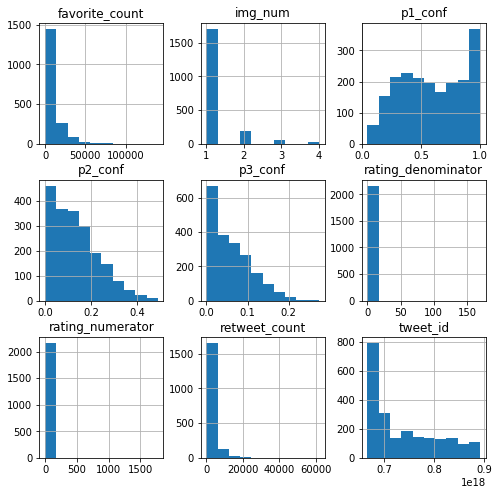

In [25]:
df.hist(figsize=(8, 8));